# Comparación de modelos de clasificación de textos

Este notebook compara los modelos entrenados:
- **PyTorch**: Modelo de Deep Learning (best_model_original.pt)
- **Scikit-learn**: Linear SVM con balance de clases (best_model_linear_svm_balanced.joblib)

## Imports

In [13]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## Carga de métricas

In [14]:
# Cargar métricas de PyTorch
with open('../docs/pytorch/metrics.json', 'r', encoding='utf-8') as f:
    pytorch_metrics = json.load(f)

# Cargar métricas de Sklearn
with open('../docs/sklearn/metrics_summary.json', 'r', encoding='utf-8') as f:
    sklearn_metrics_summary = json.load(f)

print("✓ Métricas cargadas correctamente")
print(f"\nModelo PyTorch: {pytorch_metrics['model_type']}")
print(f"Modelo sklearn: {sklearn_metrics_summary['best_model']}")

✓ Métricas cargadas correctamente

Modelo PyTorch: original
Modelo sklearn: linear_svm_balanced


## Comparación de métricas generales

Comparación de métricas generales:


,Modelo,Accuracy,Macro F1-Score,Weighted Precision,Weighted Recall,Weighted F1-Score
0,PyTorch (Deep Learning),0.770464,0.743818,0.76894,0.770464,0.761373
1,Sklearn (Linear SVM),N/A,0.767070,N/A,N/A,N/A


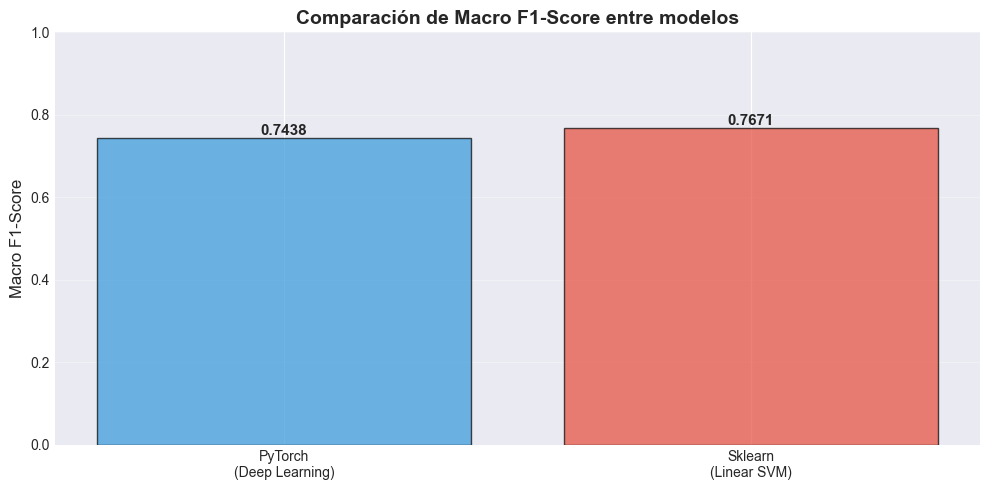


📊 Diferencia en Macro F1-Score: 0.0233
   → Sklearn es mejor por 3.13%


In [15]:
# Crear tabla comparativa de métricas principales
comparison_data = {
    'Modelo': ['PyTorch (Deep Learning)', 'Sklearn (Linear SVM)'],
    'Accuracy': [
        pytorch_metrics['best_test_accuracy'],
        'N/A'
    ],
    'Macro F1-Score': [
        pytorch_metrics['macro_f1_score'],
        sklearn_metrics_summary['all_models_macro_f1']['linear_svm']
    ],
    'Weighted Precision': [
        pytorch_metrics['classification_report']['weighted avg']['precision'],
        'N/A'
    ],
    'Weighted Recall': [
        pytorch_metrics['classification_report']['weighted avg']['recall'],
        'N/A'
    ],
    'Weighted F1-Score': [
        pytorch_metrics['classification_report']['weighted avg']['f1-score'],
        'N/A'
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print("Comparación de métricas generales:")
print("="*80)
display(df_comparison)

# Visualización de F1-Score macro
plt.figure(figsize=(10, 5))
models = ['PyTorch\n(Deep Learning)', 'Sklearn\n(Linear SVM)']
f1_scores = [
    pytorch_metrics['macro_f1_score'],
    sklearn_metrics_summary['all_models_macro_f1']['linear_svm']
]

bars = plt.bar(models, f1_scores, color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
plt.ylabel('Macro F1-Score', fontsize=12)
plt.title('Comparación de Macro F1-Score entre modelos', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar, score in zip(bars, f1_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{score:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Diferencia en Macro F1-Score: {abs(f1_scores[0] - f1_scores[1]):.4f}")
if f1_scores[0] > f1_scores[1]:
    print(f"   → PyTorch es mejor por {((f1_scores[0]/f1_scores[1] - 1) * 100):.2f}%")
else:
    print(f"   → Sklearn es mejor por {((f1_scores[1]/f1_scores[0] - 1) * 100):.2f}%")

## Análisis detallado por clase (PyTorch)

Métricas por clase - PyTorch:


,Clase,Precision,Recall,F1-Score,Support
0,Applied Ergonomics (1),0.940909,0.953917,0.947368,217
1,Neural Networks (2),0.751020,0.394850,0.517581,466
2,Expert Systems (3),0.809684,0.880605,0.843656,1918
3,Pattern Recognition (5),0.648993,0.685330,0.666667,893


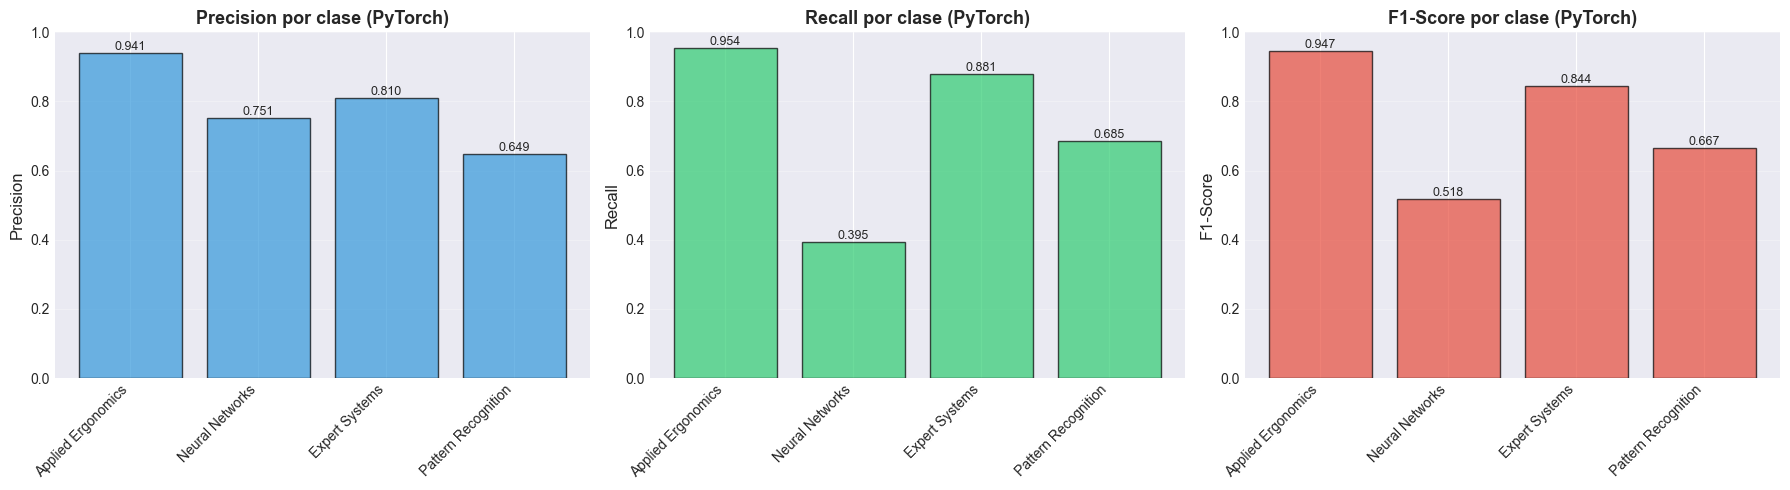

In [16]:
# Mapeo de clases
class_names = {
    '0': 'Applied Ergonomics (1)',
    '1': 'Neural Networks (2)',
    '2': 'Expert Systems (3)',
    '3': 'Pattern Recognition (5)'
}

# Extraer métricas por clase de PyTorch
pytorch_class_metrics = []
for class_id in ['0', '1', '2', '3']:
    metrics = pytorch_metrics['classification_report'][class_id]
    pytorch_class_metrics.append({
        'Clase': class_names[class_id],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1-score'],
        'Support': int(metrics['support'])
    })

df_pytorch_classes = pd.DataFrame(pytorch_class_metrics)
print("Métricas por clase - PyTorch:")
print("="*80)
display(df_pytorch_classes)

# Visualización de métricas por clase
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics_to_plot = ['Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#2ecc71', '#e74c3c']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    bars = ax.bar(range(len(df_pytorch_classes)), df_pytorch_classes[metric], 
                   color=colors[idx], alpha=0.7, edgecolor='black')
    ax.set_ylabel(metric, fontsize=12)
    ax.set_title(f'{metric} por clase (PyTorch)', fontsize=13, fontweight='bold')
    ax.set_xticks(range(len(df_pytorch_classes)))
    ax.set_xticklabels([name.split('(')[0].strip() for name in df_pytorch_classes['Clase']], 
                        rotation=45, ha='right')
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)
    
    # Añadir valores
    for bar, val in zip(bars, df_pytorch_classes[metric]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Matriz de confusión

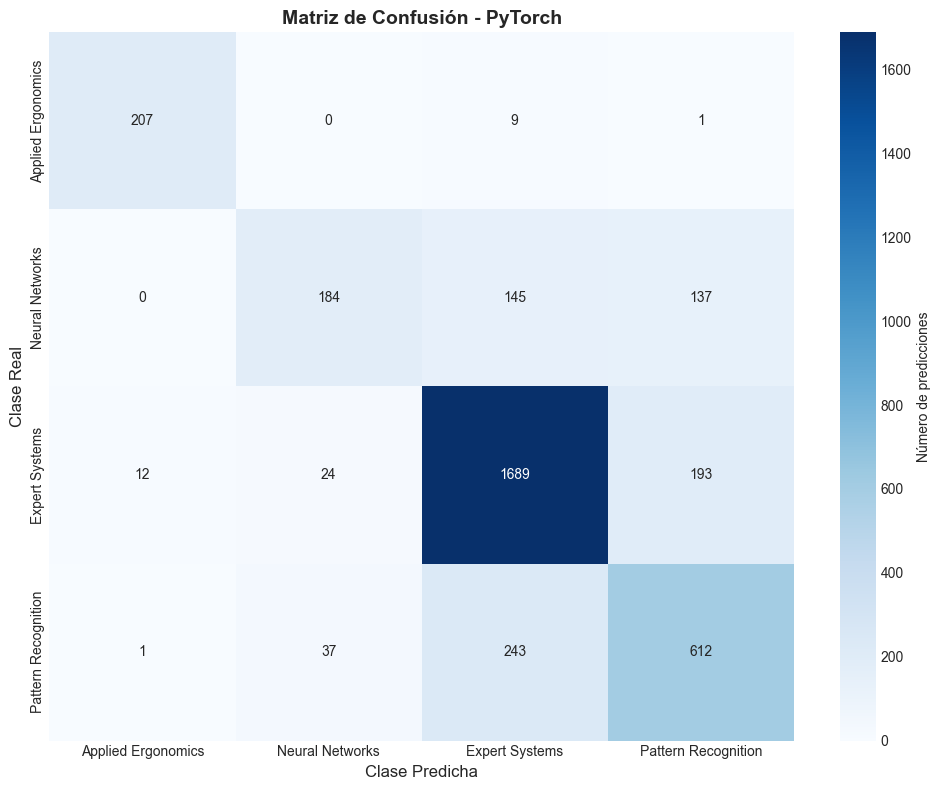

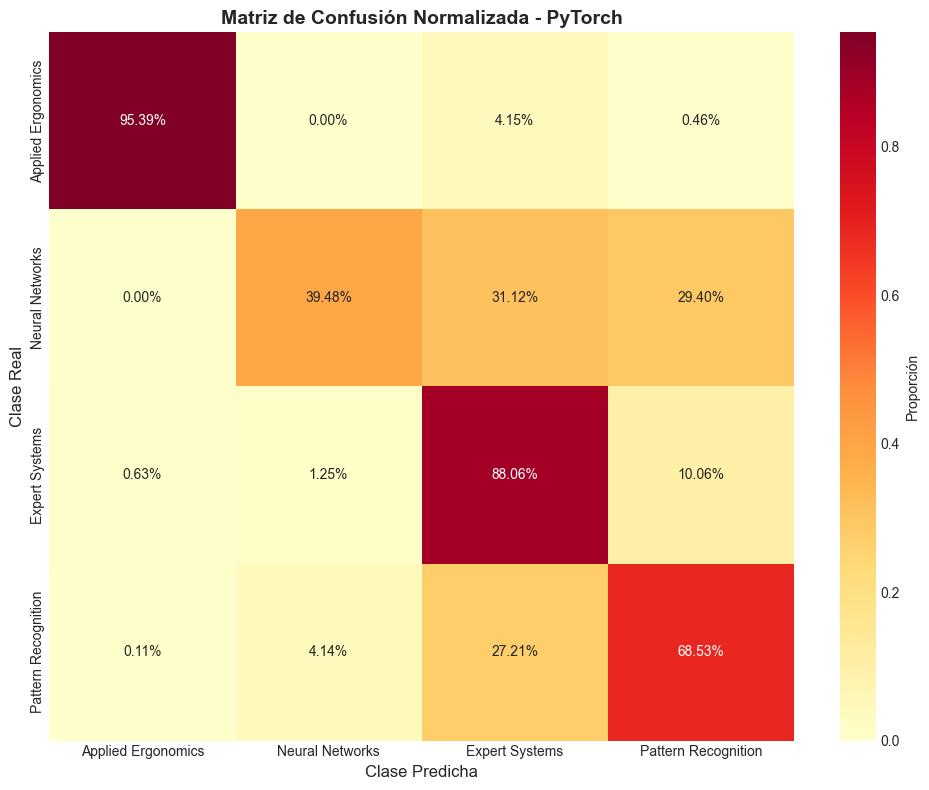

Análisis de la diagonal (predicciones correctas):
Applied Ergonomics (1)                    207/ 217 (95.39%)
Neural Networks (2)                       184/ 466 (39.48%)
Expert Systems (3)                       1689/1918 (88.06%)
Pattern Recognition (5)                   612/ 893 (68.53%)


In [17]:
# Matriz de confusión de PyTorch
cm_pytorch = np.array(pytorch_metrics['confusion_matrix'])

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm_pytorch, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[name.split('(')[0].strip() for name in class_names.values()],
            yticklabels=[name.split('(')[0].strip() for name in class_names.values()],
            cbar_kws={'label': 'Número de predicciones'})
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.title('Matriz de Confusión - PyTorch', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Calcular y mostrar matriz normalizada
cm_normalized = cm_pytorch.astype('float') / cm_pytorch.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='YlOrRd', 
            xticklabels=[name.split('(')[0].strip() for name in class_names.values()],
            yticklabels=[name.split('(')[0].strip() for name in class_names.values()],
            cbar_kws={'label': 'Proporción'})
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.title('Matriz de Confusión Normalizada - PyTorch', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Análisis de la diagonal (predicciones correctas):")
print("="*80)
for i, class_name in enumerate(class_names.values()):
    total = cm_pytorch[i].sum()
    correct = cm_pytorch[i, i]
    accuracy = correct / total
    print(f"{class_name:40} {correct:4d}/{total:4d} ({accuracy:.2%})")

## Análisis de errores

Errores PyTorch: 802 predicciones incorrectas
Errores Sklearn: 767 predicciones incorrectas

📊 Diferencia: 35 errores


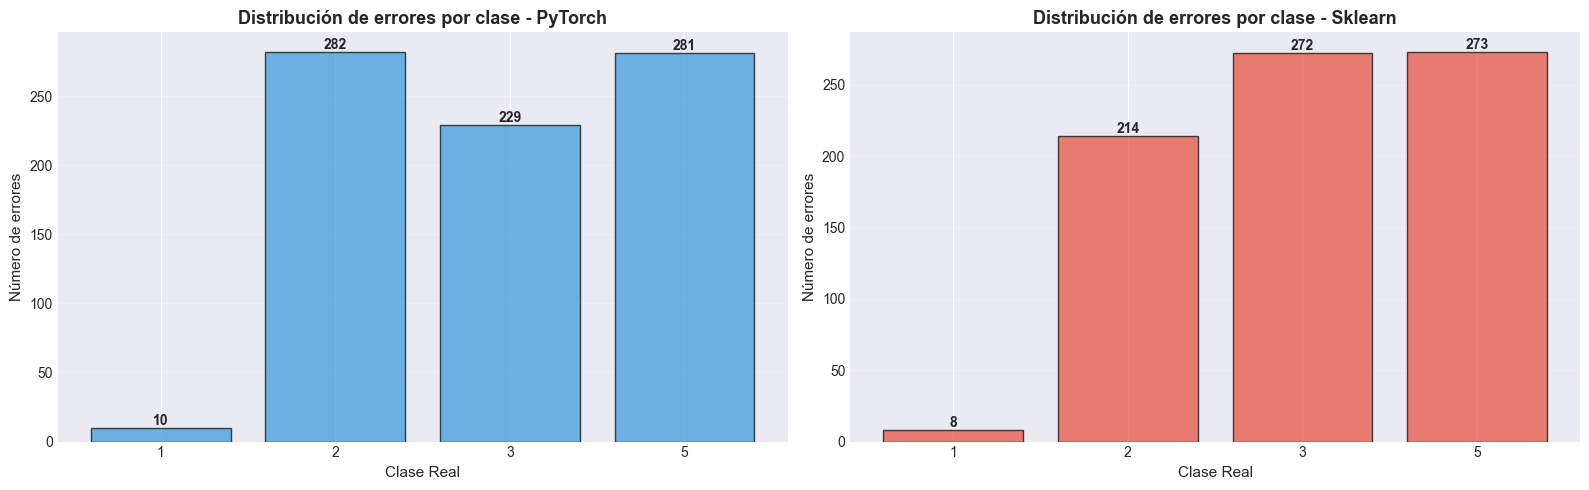

In [18]:
# Cargar errores de ambos modelos
errors_pytorch = pd.read_csv('../docs/pytorch/errors.csv')
errors_sklearn = pd.read_csv('../docs/sklearn/errors_best_model.csv')

print(f"Errores PyTorch: {len(errors_pytorch)} predicciones incorrectas")
print(f"Errores Sklearn: {len(errors_sklearn)} predicciones incorrectas")
print(f"\n📊 Diferencia: {abs(len(errors_pytorch) - len(errors_sklearn))} errores")

# Análisis de distribución de errores por clase
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# PyTorch
error_dist_pytorch = errors_pytorch['y_true'].value_counts().sort_index()
axes[0].bar(range(len(error_dist_pytorch)), error_dist_pytorch.values, 
            color='#3498db', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de errores por clase - PyTorch', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Clase Real', fontsize=11)
axes[0].set_ylabel('Número de errores', fontsize=11)
axes[0].set_xticks(range(len(error_dist_pytorch)))
axes[0].set_xticklabels(error_dist_pytorch.index)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(error_dist_pytorch.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Sklearn
error_dist_sklearn = errors_sklearn['y_true'].value_counts().sort_index()
axes[1].bar(range(len(error_dist_sklearn)), error_dist_sklearn.values, 
            color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_title('Distribución de errores por clase - Sklearn', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Clase Real', fontsize=11)
axes[1].set_ylabel('Número de errores', fontsize=11)
axes[1].set_xticks(range(len(error_dist_sklearn)))
axes[1].set_xticklabels(error_dist_sklearn.index)
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(error_dist_sklearn.values):
    axes[1].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Análisis de confusiones comunes

Top 10 confusiones más comunes - PyTorch:
Pattern Recognition (5)                  → Expert Systems (3)                       :  243 veces
Expert Systems (3)                       → Pattern Recognition (5)                  :  193 veces
Neural Networks (2)                      → Expert Systems (3)                       :  145 veces
Neural Networks (2)                      → Pattern Recognition (5)                  :  137 veces
Pattern Recognition (5)                  → Neural Networks (2)                      :   37 veces
Expert Systems (3)                       → Neural Networks (2)                      :   24 veces
Expert Systems (3)                       → Applied Ergonomics (1)                   :   12 veces
Applied Ergonomics (1)                   → Expert Systems (3)                       :    9 veces
Applied Ergonomics (1)                   → Pattern Recognition (5)                  :    1 veces
Pattern Recognition (5)                  → Applied Ergonomics (1)                   :

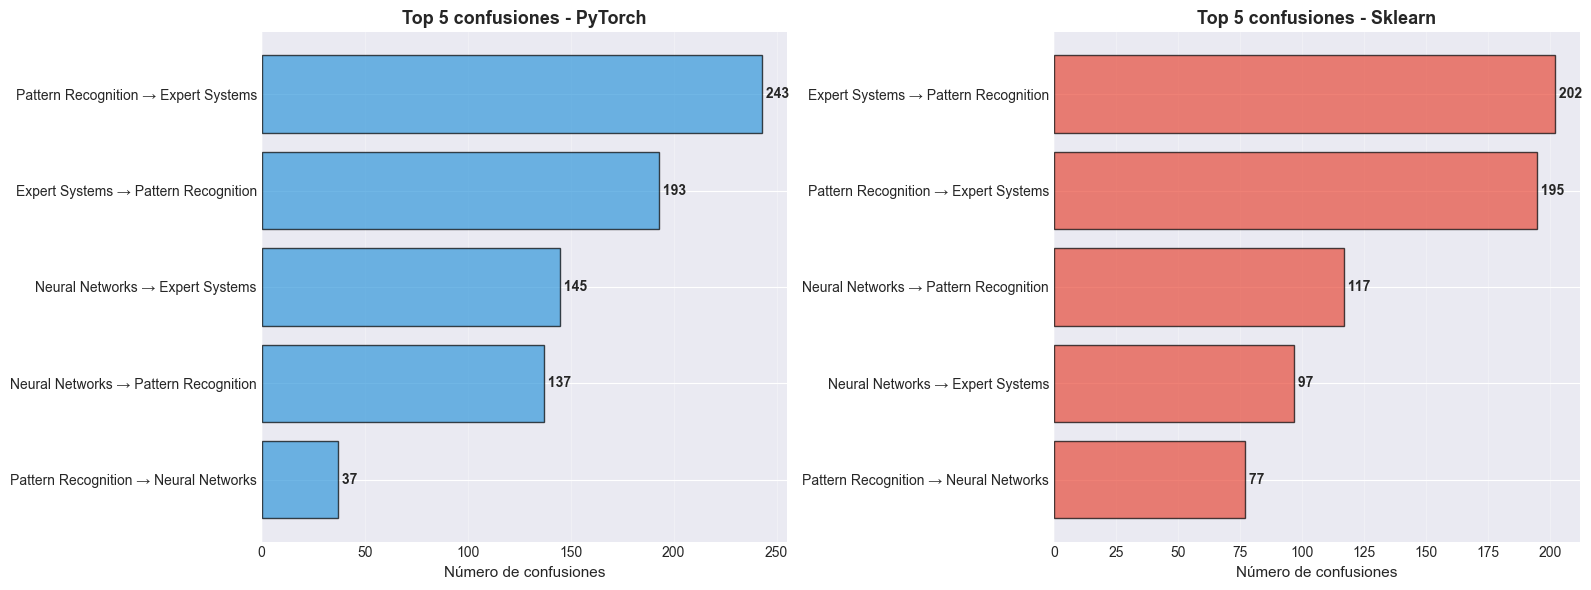

In [20]:
# Mapeo de journal_id a nombres (para los CSVs de errores que usan journal_id original)
class_names_errors = {
    '1': 'Applied Ergonomics (1)',
    '2': 'Neural Networks (2)',
    '3': 'Expert Systems (3)',
    '5': 'Pattern Recognition (5)'
}

# Analizar las confusiones más comunes en PyTorch
confusion_pairs_pytorch = errors_pytorch.groupby(['y_true', 'y_pred']).size().reset_index(name='count')
confusion_pairs_pytorch = confusion_pairs_pytorch.sort_values('count', ascending=False).head(10)

print("Top 10 confusiones más comunes - PyTorch:")
print("="*80)
for idx, row in confusion_pairs_pytorch.iterrows():
    true_class = class_names_errors[str(int(row['y_true']))]
    pred_class = class_names_errors[str(int(row['y_pred']))]
    count = row['count']
    print(f"{true_class:40} → {pred_class:40} : {count:4d} veces")

# Analizar las confusiones más comunes en Sklearn
confusion_pairs_sklearn = errors_sklearn.groupby(['y_true', 'y_pred']).size().reset_index(name='count')
confusion_pairs_sklearn = confusion_pairs_sklearn.sort_values('count', ascending=False).head(10)

print("\n\nTop 10 confusiones más comunes - Sklearn:")
print("="*80)
for idx, row in confusion_pairs_sklearn.iterrows():
    true_class = class_names_errors[str(int(row['y_true']))]
    pred_class = class_names_errors[str(int(row['y_pred']))]
    count = row['count']
    print(f"{true_class:40} → {pred_class:40} : {count:4d} veces")

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PyTorch
top5_pytorch = confusion_pairs_pytorch.head(5)
labels_pytorch = [f"{class_names_errors[str(int(row['y_true']))].split('(')[0].strip()} → {class_names_errors[str(int(row['y_pred']))].split('(')[0].strip()}" 
                  for _, row in top5_pytorch.iterrows()]
axes[0].barh(range(len(top5_pytorch)), top5_pytorch['count'], color='#3498db', alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(top5_pytorch)))
axes[0].set_yticklabels(labels_pytorch)
axes[0].set_xlabel('Número de confusiones', fontsize=11)
axes[0].set_title('Top 5 confusiones - PyTorch', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

for i, v in enumerate(top5_pytorch['count']):
    axes[0].text(v, i, f' {v}', va='center', fontweight='bold')

# Sklearn
top5_sklearn = confusion_pairs_sklearn.head(5)
labels_sklearn = [f"{class_names_errors[str(int(row['y_true']))].split('(')[0].strip()} → {class_names_errors[str(int(row['y_pred']))].split('(')[0].strip()}" 
                  for _, row in top5_sklearn.iterrows()]
axes[1].barh(range(len(top5_sklearn)), top5_sklearn['count'], color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(top5_sklearn)))
axes[1].set_yticklabels(labels_sklearn)
axes[1].set_xlabel('Número de confusiones', fontsize=11)
axes[1].set_title('Top 5 confusiones - Sklearn', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

for i, v in enumerate(top5_sklearn['count']):
    axes[1].text(v, i, f' {v}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Comparación de todos los modelos sklearn

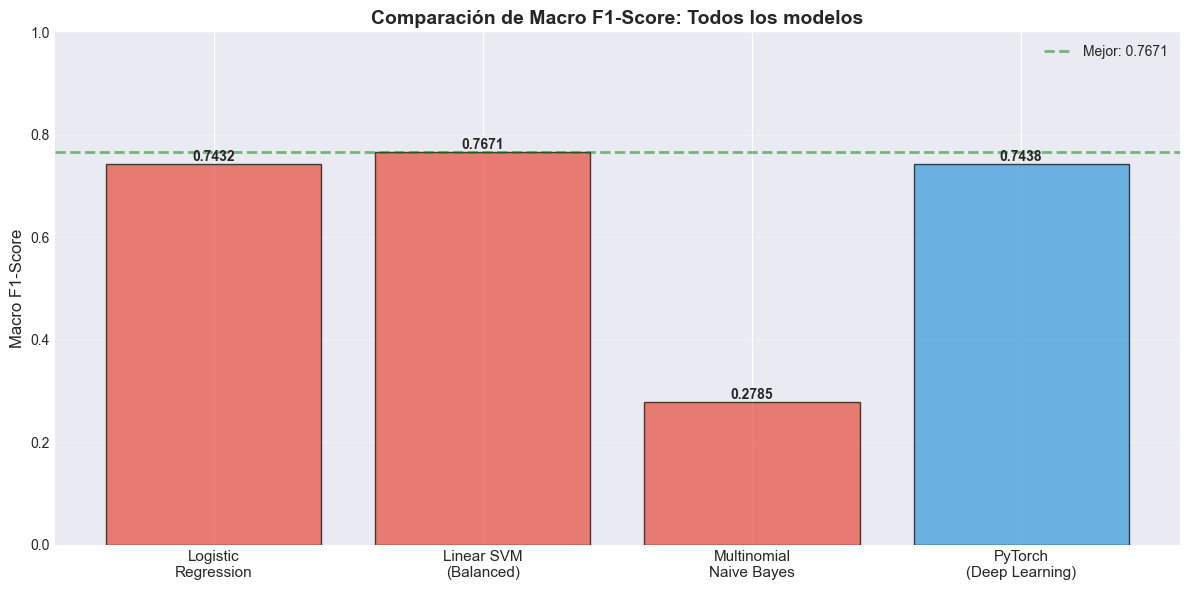


🏆 Ranking de modelos por Macro F1-Score:
🥇 1. linear_svm                     : 0.7671
🥈 2. PyTorch                        : 0.7438
🥉 3. logreg                         : 0.7432
   4. mnb                            : 0.2785


In [21]:
# Comparar todos los modelos sklearn probados
sklearn_models = sklearn_metrics_summary['all_models_macro_f1']

fig, ax = plt.subplots(figsize=(12, 6))

models_names = list(sklearn_models.keys())
f1_values = list(sklearn_models.values())

# Añadir PyTorch para comparación
models_names.append('PyTorch')
f1_values.append(pytorch_metrics['macro_f1_score'])

# Colores diferentes para sklearn vs pytorch
colors = ['#e74c3c' if m != 'PyTorch' else '#3498db' for m in models_names]

bars = ax.bar(range(len(models_names)), f1_values, color=colors, alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(models_names)))
ax.set_xticklabels(['Logistic\nRegression', 'Linear SVM\n(Balanced)', 
                     'Multinomial\nNaive Bayes', 'PyTorch\n(Deep Learning)'], 
                    fontsize=11)
ax.set_ylabel('Macro F1-Score', fontsize=12)
ax.set_title('Comparación de Macro F1-Score: Todos los modelos', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Añadir valores
for bar, val in zip(bars, f1_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.4f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Añadir línea del mejor modelo
best_score = max(f1_values)
ax.axhline(y=best_score, color='green', linestyle='--', alpha=0.5, linewidth=2, 
           label=f'Mejor: {best_score:.4f}')
ax.legend()

plt.tight_layout()
plt.show()

# Ranking
print("\n🏆 Ranking de modelos por Macro F1-Score:")
print("="*80)
ranking = sorted(zip(models_names, f1_values), key=lambda x: x[1], reverse=True)
for rank, (model, score) in enumerate(ranking, 1):
    medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
    print(f"{medal} {rank}. {model:30} : {score:.4f}")

## Resumen

In [ ]:
print("="*80)
print(" "*25 + "RESUMEN DE COMPARACIÓN")
print("="*80)

print("\nMÉTRICAS PRINCIPALES:")
print(f"   PyTorch (Deep Learning):")
print(f"      - Accuracy: {pytorch_metrics['best_test_accuracy']:.4f}")
print(f"      - Macro F1-Score: {pytorch_metrics['macro_f1_score']:.4f}")
print(f"      - Errores de clasificación: {len(errors_pytorch)}")

print(f"\n   Sklearn (Linear SVM Balanced):")
print(f"      - Macro F1-Score: {sklearn_metrics_summary['all_models_macro_f1']['linear_svm']:.4f}")
print(f"      - Errores de clasificación: {len(errors_sklearn)}")

print("\n\nMEJOR RENDIMIENTO POR CLASE (PyTorch):")
best_class = df_pytorch_classes.loc[df_pytorch_classes['F1-Score'].idxmax()]
worst_class = df_pytorch_classes.loc[df_pytorch_classes['F1-Score'].idxmin()]
print(f"   Mejor: {best_class['Clase']} (F1={best_class['F1-Score']:.4f})")
print(f"   Peor:  {worst_class['Clase']} (F1={worst_class['F1-Score']:.4f})")

print("\n\nOBSERVACIONES:")
if pytorch_metrics['macro_f1_score'] > sklearn_metrics_summary['all_models_macro_f1']['linear_svm']:
    diff = pytorch_metrics['macro_f1_score'] - sklearn_metrics_summary['all_models_macro_f1']['linear_svm']
    print(f"   • PyTorch supera a Sklearn por {diff:.4f} puntos en Macro F1-Score")
else:
    diff = sklearn_metrics_summary['all_models_macro_f1']['linear_svm'] - pytorch_metrics['macro_f1_score']
    print(f"   • Sklearn supera a PyTorch por {diff:.4f} puntos en Macro F1-Score")

print(f"   • La clase con más confusión en PyTorch es: {worst_class['Clase'].split('(')[0].strip()}")
print(f"   • Diferencia en número de errores: {abs(len(errors_pytorch) - len(errors_sklearn))} predicciones")

print("\n" + "="*80)